In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv');

### Data Summary

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plotting

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

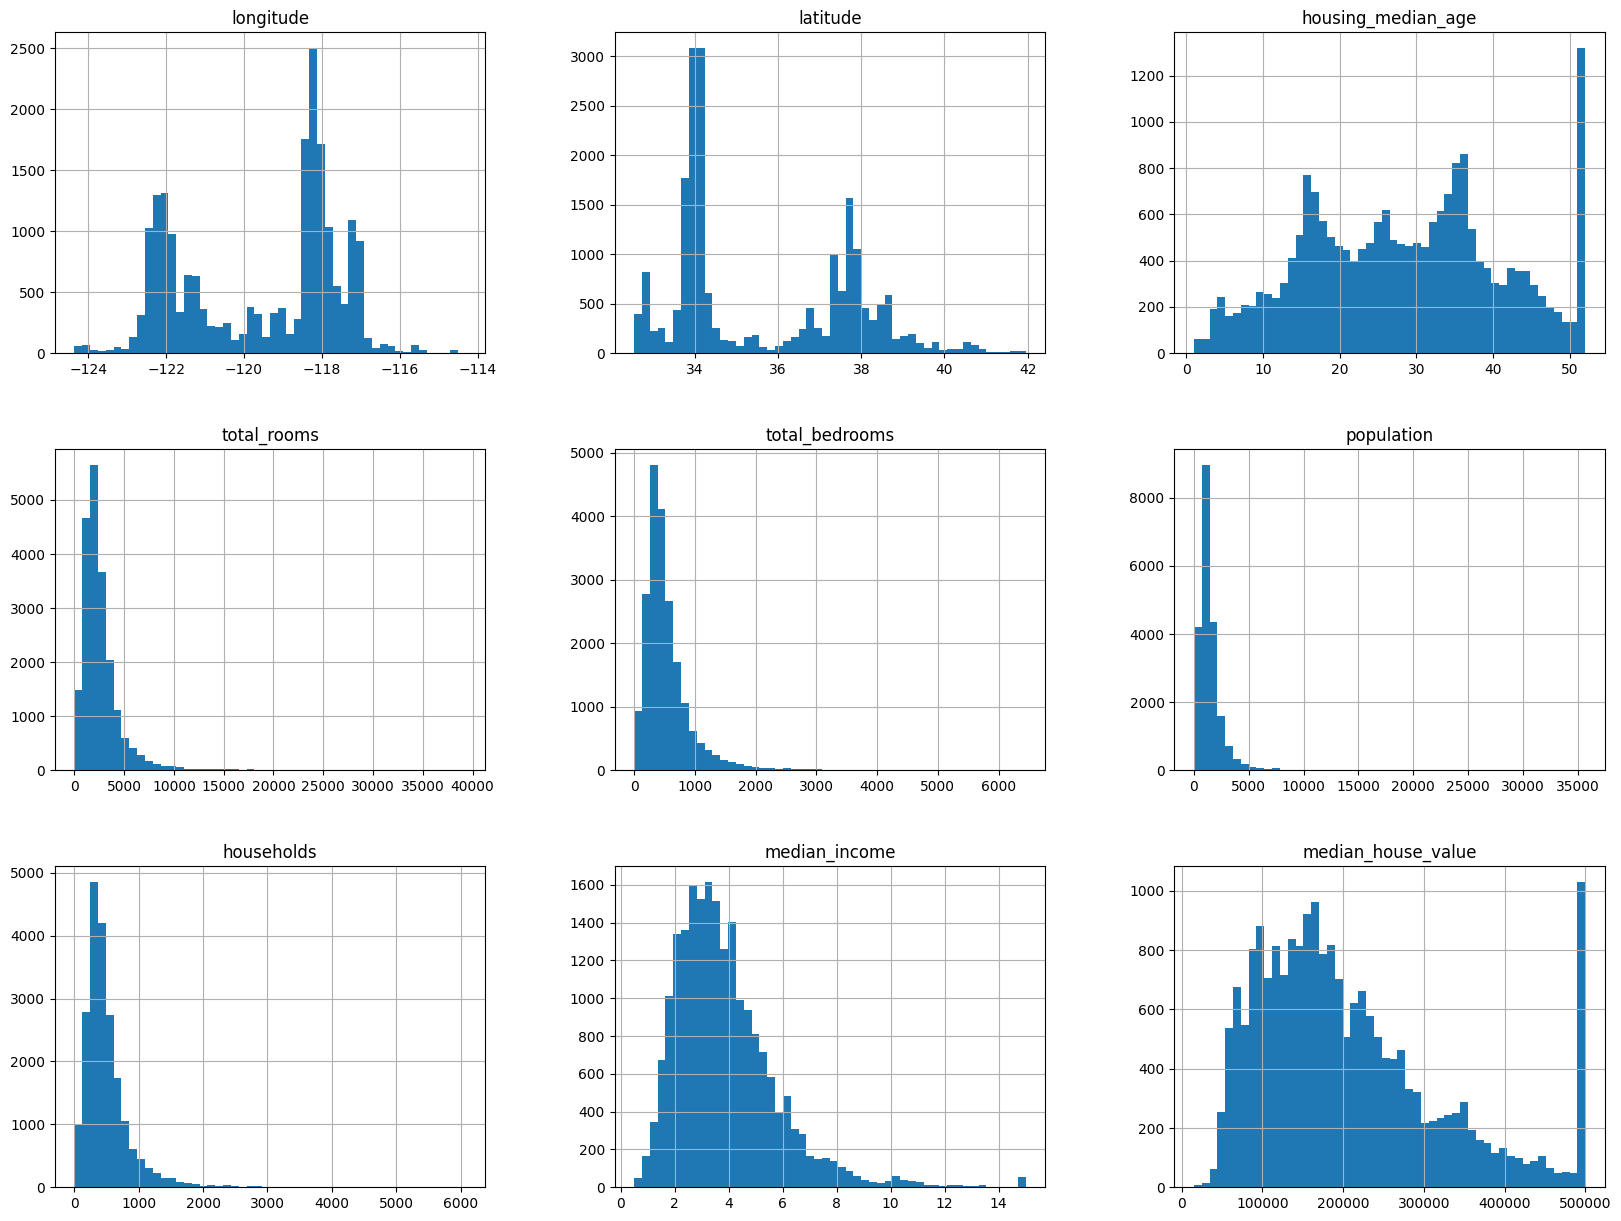

In [8]:
housing.hist(bins=50, figsize=(20,15))

## Splitting Data

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Data Manipulation
### Add attribute: Income Category
Adding Income Category attribute (income_cat) to capture various categories of income. This will influence the house prices.

<Axes: >

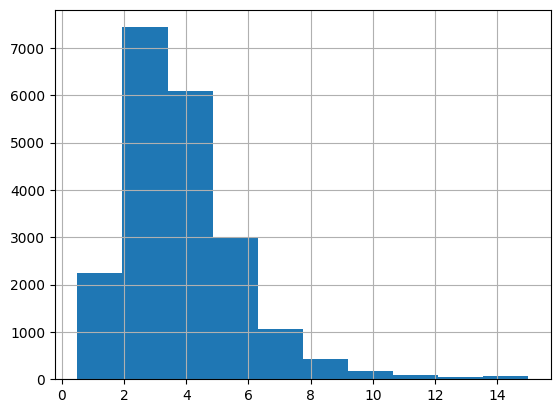

In [10]:
housing.median_income.hist()

In [11]:
# limit the number of income categories by dividing by 1.5 (no science behind selecting 1.5, just select what feels right)
# round up using ceil, to have discrete categories
housing["income_cat"] = np.ceil(housing.median_income / 1.5)
# merge all categories greater than 5 to 5 itself (categories of 6 and above also exist if we see the histogram of median income)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [12]:
housing.income_cat.value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

<Axes: >

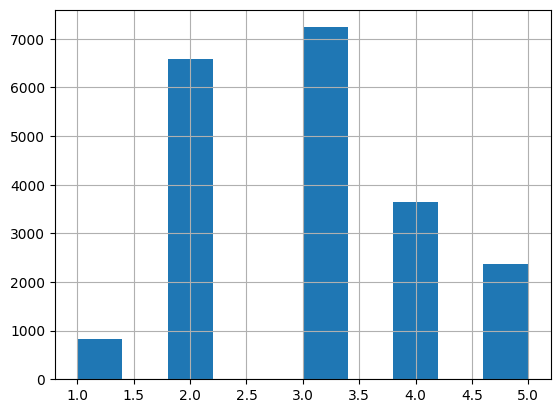

In [13]:
housing.income_cat.hist()

## Stratified Sampling
capturing samples that represent the data and avoiding skewness

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts()

income_cat
3.0    1447
2.0    1316
4.0     728
5.0     472
1.0     165
Name: count, dtype: int64

<Axes: >

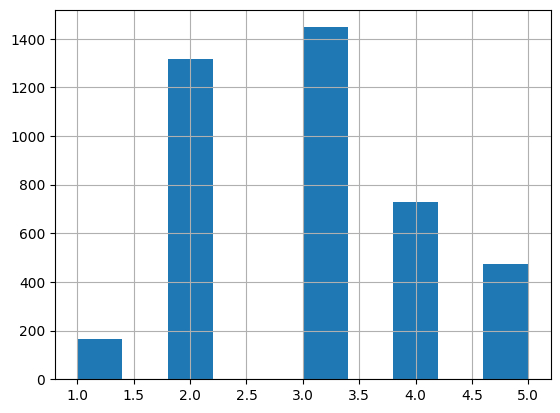

In [16]:
strat_test_set.income_cat.hist()

Remove income_cat attribute so the data is back to its original state

In [17]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [18]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


## Discover & Visualize

In [19]:
# copying training set so that we don't hamper with original data
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

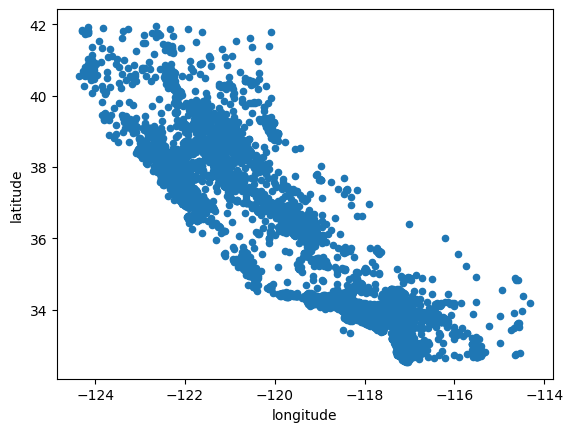

In [20]:
# since our data has latitude and longitude, let's check how it is spread geographically
housing.plot(kind="scatter", x="longitude", y="latitude")

let's set alpha to 0.1 to better understand the density

<Axes: xlabel='longitude', ylabel='latitude'>

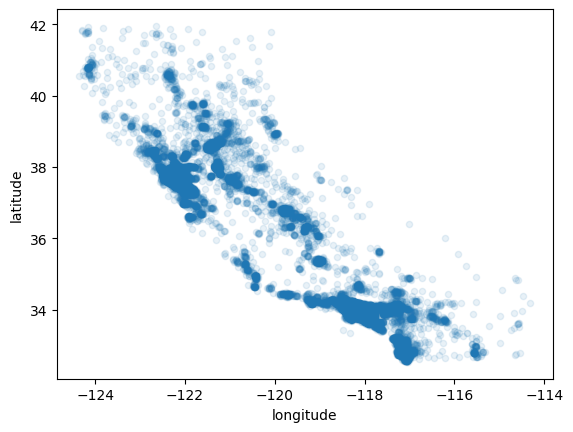

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Visualize Housing prices

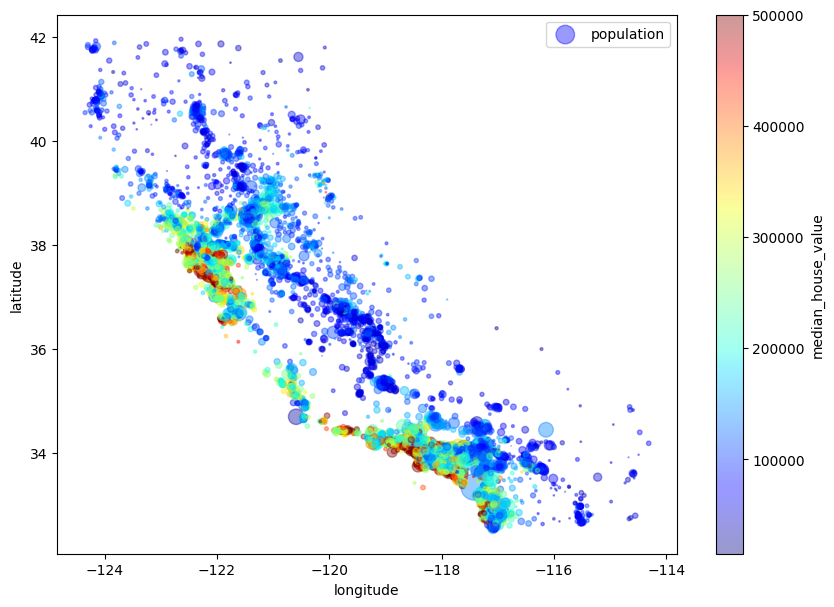

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7))
plt.legend()

We can see,

prices are high near the beaches/ocean's proximity
prices are high are dense areas

## Correlation of features with House Prices
Let us find out correlation between attributes/features, so that we can identify the ones that actually affect the housing prices.
We have a categorical data attribute "Ocean Proximity". We need to resolve it to numeric form first.

In [23]:
housing_one_hot_encoded = pd.get_dummies(housing,columns=['ocean_proximity'],)
housing_one_hot_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,False,True,False,False,False
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,False,False,False,False,True
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,False,True,False,False,False
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,False,False,False,False,True
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,True,False,False,False,False


In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [25]:
import seaborn as sns

In [26]:
corr_matrix = housing_one_hot_encoded.corr()

Text(0.5, 1.0, 'Multi-Collinearity of Features')

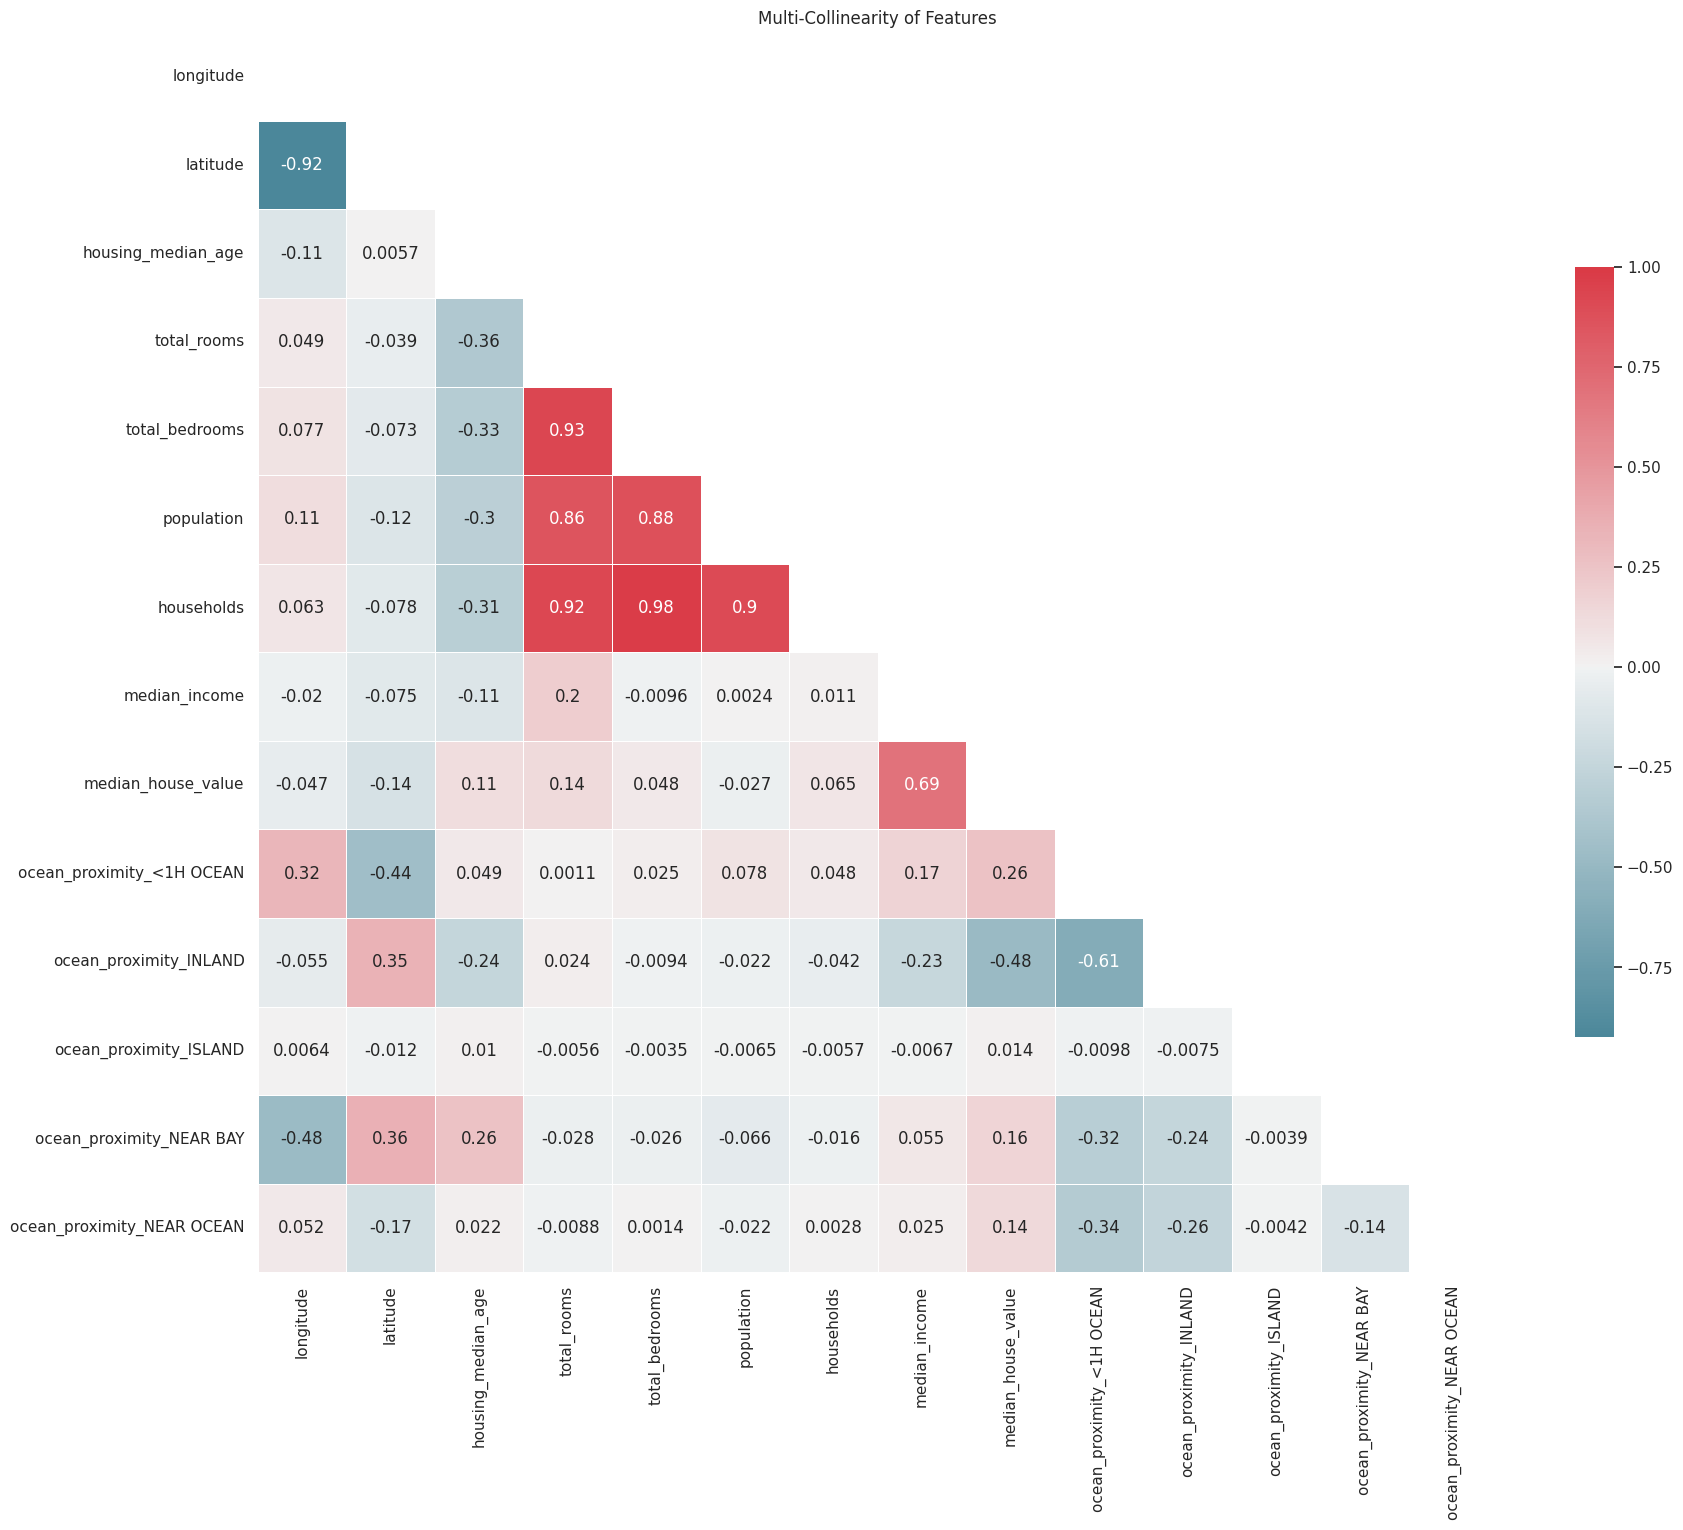

In [27]:
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_matrix,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
ax.set_title('Multi-Collinearity of Features')

With one-hot-encoding the Ocean Proximity, we can see based on the type of area, how is the median housing value affected.
Let us also reimagine the ocean proximity in a different view by converting it to different view type.
We know that the data looks like this:

In [28]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

Let us assign a value to the types of area.
But we know that values hold a meaning. Hence, the areas that have higher prices must be allotted higher values. 
We can derive these values based on one-hot-encoded correlations by looking at the heatmap.
let us assign values as below mapping:

In [29]:
replacement_mapping = {'<1H OCEAN': 5, 'INLAND': 1, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 2}

housing_encoded_2 = housing.copy()
# Replace values in the 'ocean proximity' column
housing_encoded_2['ocean_proximity'] = housing_encoded_2['ocean_proximity'].replace(replacement_mapping)
housing_encoded_2.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,1
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,3
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,1
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,5


In [30]:
corr_matrix = housing_encoded_2.corr()

Text(0.5, 1.0, 'Multi-Collinearity of Features')

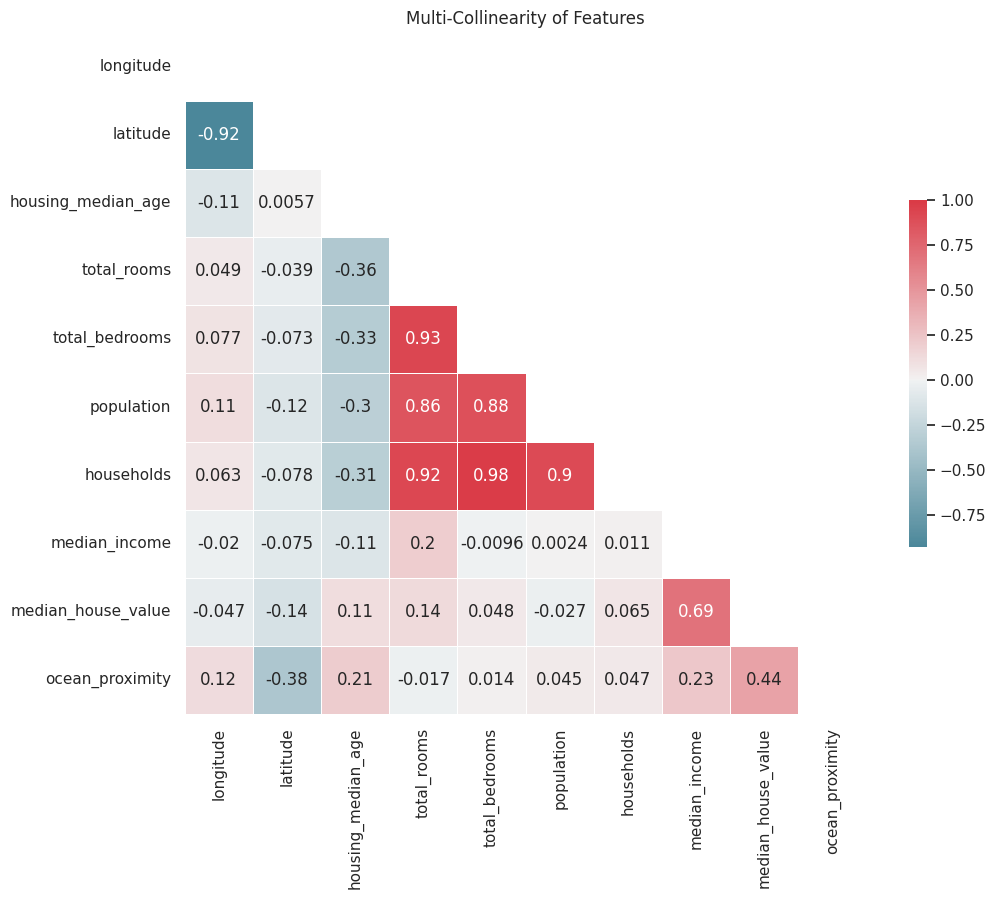

In [31]:
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_matrix,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
ax.set_title('Multi-Collinearity of Features')

This way we identify the effect of ocean proximity on housing prices.

### Scatter Matrix for correlation

another way to check for correlation is to check the scatter matrix, which maps every numerical attribute against every other numerical attribute.

In [32]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>,
        <Axes: xlabel='ocean_proximity', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
 

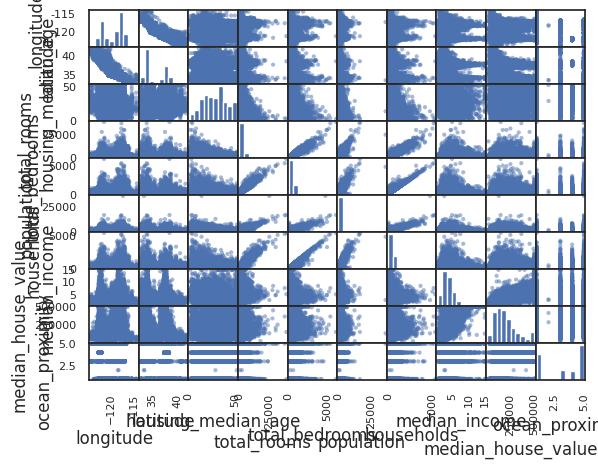

In [33]:
scatter_matrix(housing_encoded_2)


Since we have many numerical attributes {(10+)^2 = 100+ ), we will not be able to accommodate these many here.

Let us select a few that are of significant importance compared to others (identifying these with heat map).

In [34]:
attributes = ['median_house_value', 'housing_median_age','total_rooms','median_income']

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='total_rooms'

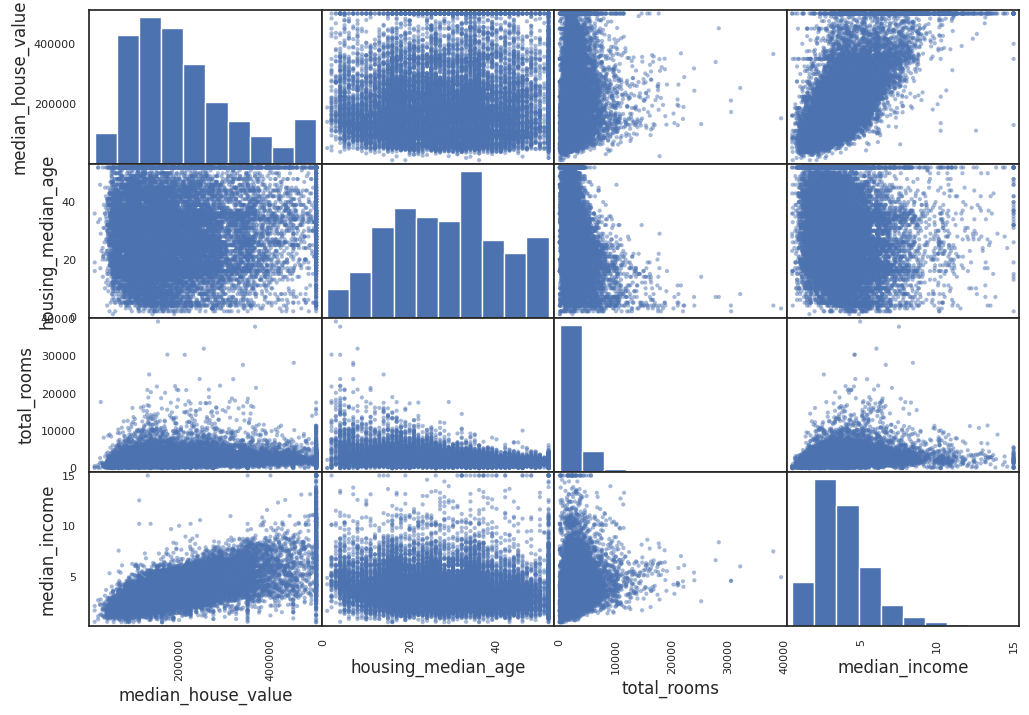

In [35]:
scatter_matrix(housing_encoded_2[attributes], figsize=(12,8))

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='ocean_proximity', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='ocean_proximity', ylabel='housing_median_age'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='ocean_pro

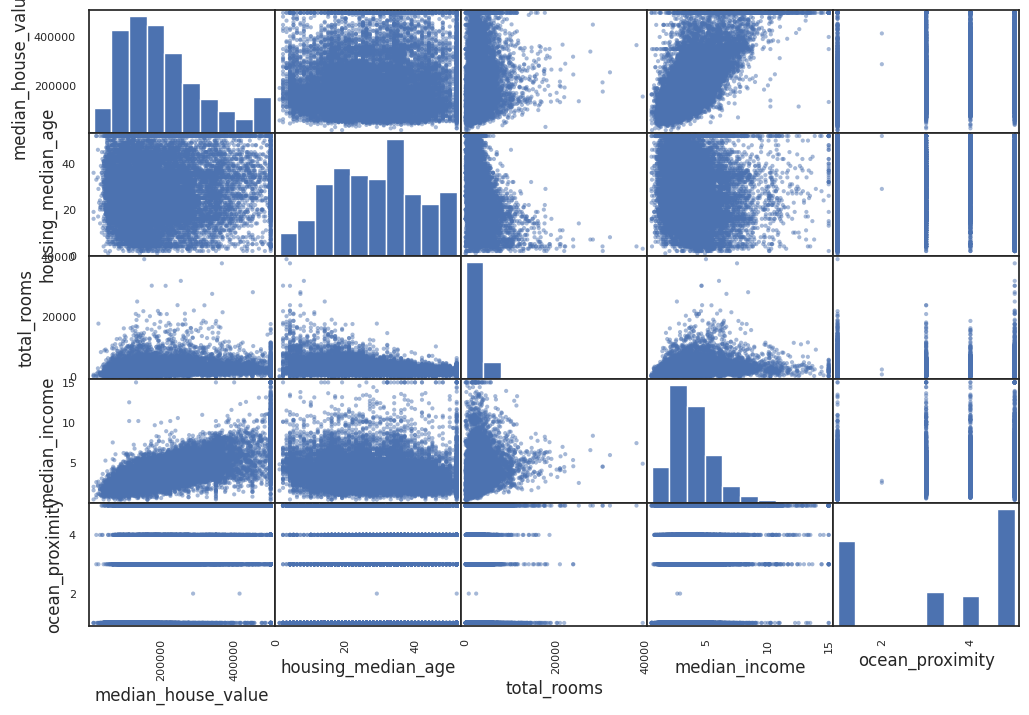

In [36]:
attributes = ['median_house_value', 'housing_median_age','total_rooms','median_income', 'ocean_proximity']
scatter_matrix(housing_encoded_2[attributes], figsize=(12,8))

we see (form heatmap & scatter matrix) that Median Income is the most promising attribute to predict house prices/house value.

### Additional Attributes

We see other attributes that are slightly correlated but they do not make much sense by themselves.
1. Total number of rooms </br>
    we can see that total rooms is highly correlated to total bedrooms, population & household.
    It will be better if we know `Number of rooms per household`.
2. Total number of bedrooms </br>
    Similarly, we may want to know in the number of rooms how many are bedrooms.
    So basically compare `number of bedrooms to number of rooms`.
    Let us have that in a ratio for better understanding.
    We can also use `number of bedrooms per household`.
3. Population </br>
    we see that prices are slightly related to total rooms & total bedrooms.
    But these two have high correlation to population.
    Population in turn is highly correlated to households.
    Let us identify them together.
    `Population per household`.

In [37]:
housing_encoded_2['rooms_per_household'] = housing_encoded_2.total_rooms / housing_encoded_2.households
housing_encoded_2['bedrooms_to_rooms'] = housing_encoded_2.total_bedrooms / housing_encoded_2.total_rooms
housing_encoded_2['bedrooms_per_household'] = housing_encoded_2.total_bedrooms / housing_encoded_2.households
housing_encoded_2['population_per_household'] = housing_encoded_2.population / housing_encoded_2.households

In [38]:
corr_matrix = housing_encoded_2.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
ocean_proximity             0.435705
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
bedrooms_per_household     -0.043349
longitude                  -0.047466
latitude                   -0.142673
bedrooms_to_rooms          -0.259952
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'Multi-Collinearity of Features')

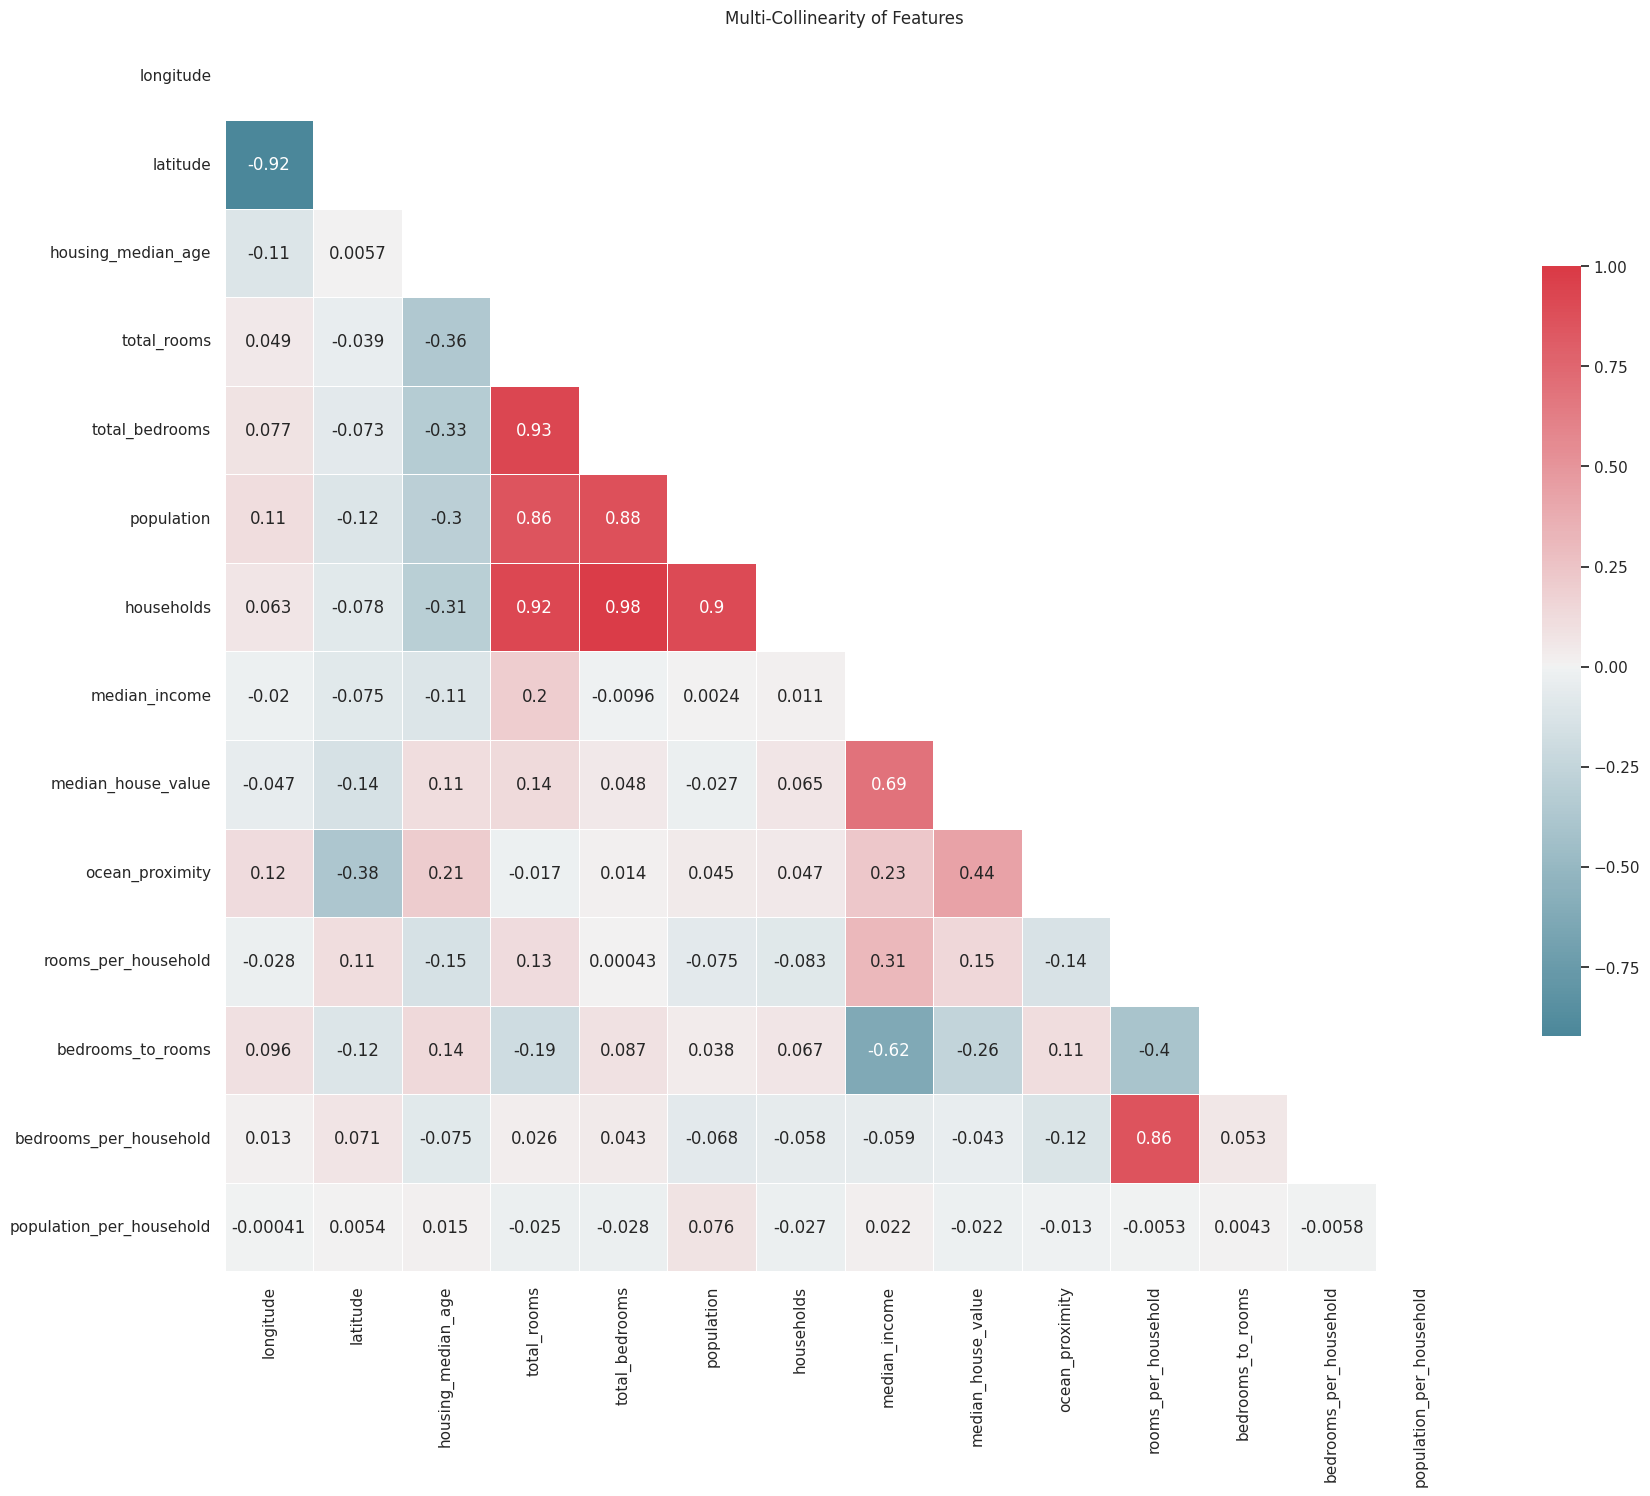

In [39]:
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_matrix,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
ax.set_title('Multi-Collinearity of Features')

Now we get much more idea on useful features for house value prediction.
We have identified these attributes are better contributing to the price prediction:
1. median income (.69)
2. housing median age (.11)
3. rooms per house hold (.15) > total rooms (.14)
4. bedrooms to rooms (.26)
5. total bedrooms (.048) > bedrooms per household (.043)

etc.

## Prepare Data for ML Algorithms

So far we have done Exploratory Data Analysis on what features give us meaningful insights.
Now we need to revert the data back to be used in our ML algos.

In [41]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

Now, we know that there are some samples/rows that are empty for certain features.

1. we can either get rid of the empty column from the whole data set (not very comfortable with this).
2. we can get rid of the samples having empty attributes (I don't want to do this either, since it can reduce the data significantly sometimes)
3. we can fill the empty attributes with some value (0, mean, median, etc.) ✅

    ```
    median = housing['total_bedrooms'].median()
    housing['total_bedrooms'].fillna(median, inplace=True)
    ```
   p.s. we make sure to save the filling value for later to be filled in the test set as well.
   
We can similarly use a handy function called Simple Imputer, that does the same.

### Simple Imputer
It works with numerical data. So we need to make a copy of data without string attribute ('ocean proximity')

note: a property in this 'strategy="most_frequent"' can be used even with the string data

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy='median')

In [44]:
housing_numerical = housing.drop('ocean_proximity',axis=1)

In [45]:
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

compare the median observed by imputer with the median calculated manually:

In [50]:
print('Imputer : ',imputer.statistics_)
print('Calculated : ', housing_numerical.median().values)

Imputer :  [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
Calculated :  [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


Now we replace the missing values in the dataset with the value learned by the imputer.

In [52]:
X = imputer.transform(housing_numerical) # gives a numpy array, so we convert back to pandas dataframe
housing_transformed = pd.DataFrame(X, columns=housing_numerical.columns, index=housing_numerical.index)